In [1]:
from scrape import get_results
from scrape import get_data
from scrape import grab_years_played
from scrape import revised_run
from scrape import train_test
from scrape import read_adps
from scrape import summarize_proj

2022 WR Projections

In [2]:
X_train2022, X_test2022 = train_test('qb', num_years=5, year_for=2022)
xgbPPR_results = revised_run(X_train2022, X_test2022, 'qb', year_for='2022')
xgbPPR_results.head(50)

======= Fold 0 ========
Our accuracy on the validation set is 5.049919730995056
======= Fold 1 ========
Our accuracy on the validation set is 4.769587035028748
======= Fold 2 ========
Our accuracy on the validation set is 3.9496799738611905
======= Fold 3 ========
Our accuracy on the validation set is 6.3621582555968565
======= Fold 4 ========
Our accuracy on the validation set is 6.6616931326546185
Overall accuracy: 5.358607625627294
iteration 1: Dimensions = (38, 2)
iteration 2: Dimensions = (76, 2)
iteration 3: Dimensions = (114, 2)
iteration 4: Dimensions = (152, 2)
iteration 5: Dimensions = (190, 2)
Index(['name', 'proj fpts', 'rank'], dtype='object')


,name,proj fpts,rank,last rank
0,jalen-hurts,27.084558,1,3
1,justin-fields,22.267859,2,6
2,patrick-mahomes,21.257846,3,1
3,josh-allen-qb,21.046786,4,2
4,daniel-jones,20.741568,5,9
5,joe-burrow,20.413596,6,4
6,geno-smith,20.036444,7,5
7,trevor-lawrence,19.677145,8,8
8,lamar-jackson,19.393440,9,13
9,aaron-rodgers,18.257591,10,12


======= Fold 0 ========
Our accuracy on the validation set is 4.0978223803283385
======= Fold 1 ========
Our accuracy on the validation set is 4.643564597457612
======= Fold 2 ========
Our accuracy on the validation set is 3.7644860937854507
======= Fold 3 ========
Our accuracy on the validation set is 5.512743584406157
======= Fold 4 ========
Our accuracy on the validation set is 5.987625088219221
Overall accuracy: 4.801248348839356
iteration 1: Dimensions = (38, 2)
iteration 2: Dimensions = (76, 2)
iteration 3: Dimensions = (114, 2)
iteration 4: Dimensions = (152, 2)
iteration 5: Dimensions = (190, 2)
Index(['name', 'proj fpts', 'rank'], dtype='object')


,name,proj fpts,rank,last rank
0,jalen-hurts,24.260646,1,3
1,justin-fields,20.787434,2,6
2,josh-allen-qb,20.575403,3,2
3,joe-burrow,20.270013,4,4
4,patrick-mahomes,20.166869,5,1
5,daniel-jones,19.506349,6,9
6,geno-smith,18.801565,7,5
7,trevor-lawrence,18.734068,8,8
8,lamar-jackson,18.519793,9,13
9,tua-tagovailoa,17.918913,10,14


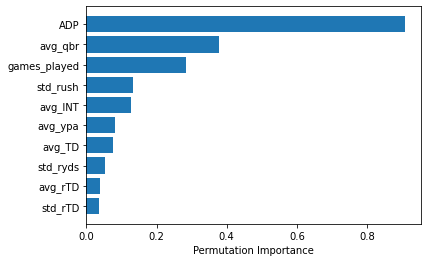

In [3]:
enetPPR_results = revised_run(X_train2022, X_test2022, 'qb', model_ = 'enet', pca=False)
enetPPR_results.head(50)

======= Fold 0 ========
Our accuracy on the validation set is 4.472943499724106
======= Fold 1 ========
Our accuracy on the validation set is 4.140850083472368
======= Fold 2 ========
Our accuracy on the validation set is 3.7900680261516615
======= Fold 3 ========
Our accuracy on the validation set is 5.503509841131256
======= Fold 4 ========
Our accuracy on the validation set is 4.949033296657902
Overall accuracy: 4.571280949427459
iteration 1: Dimensions = (38, 2)
iteration 2: Dimensions = (76, 2)
iteration 3: Dimensions = (114, 2)
iteration 4: Dimensions = (152, 2)
iteration 5: Dimensions = (190, 2)
Index(['name', 'proj fpts', 'rank'], dtype='object')


,name,proj fpts,rank,last rank
0,josh-allen-qb,23.7962,1,2
1,joe-burrow,22.5724,2,4
2,jalen-hurts,22.0104,3,3
3,justin-fields,21.9298,4,6
4,lamar-jackson,21.4388,5,13
5,patrick-mahomes,20.9692,6,1
6,trevor-lawrence,20.7254,7,8
7,justin-herbert,19.1726,8,11
8,deshaun-watson,18.7188,9,30
9,dak-prescott,18.4650,10,17


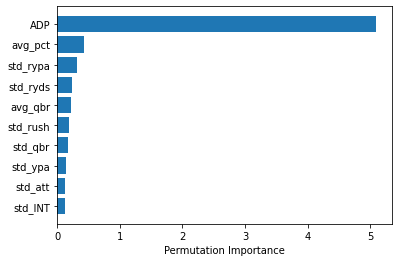

In [4]:
rfPPR_results = revised_run(X_train2022, X_test2022, 'qb', model_ = 'rf', pca=False)
rfPPR_results.head(50)

In [5]:
svrPPR_results = revised_run(X_train2022, X_test2022, 'qb', model_ = 'svr')
svrPPR_results.head(50)

======= Fold 0 ========
Our accuracy on the validation set is 4.5583385037132
======= Fold 1 ========
Our accuracy on the validation set is 4.820974697765139
======= Fold 2 ========
Our accuracy on the validation set is 4.245813853003129
======= Fold 3 ========
Our accuracy on the validation set is 5.1818910164366105
======= Fold 4 ========
Our accuracy on the validation set is 7.124950349256112
Overall accuracy: 5.1863936840348375
iteration 1: Dimensions = (38, 2)
iteration 2: Dimensions = (76, 2)
iteration 3: Dimensions = (114, 2)
iteration 4: Dimensions = (152, 2)
iteration 5: Dimensions = (190, 2)
Index(['name', 'proj fpts', 'rank'], dtype='object')


,name,proj fpts,rank,last rank
0,jalen-hurts,23.144856,1,3
1,josh-allen-qb,21.702864,2,2
2,joe-burrow,21.004257,3,4
3,daniel-jones,20.803933,4,9
4,patrick-mahomes,20.717929,5,1
5,trevor-lawrence,20.636361,6,8
6,justin-fields,19.359910,7,6
7,lamar-jackson,18.927697,8,13
8,kyler-murray,18.403416,9,18
9,dak-prescott,18.271753,10,17


In [6]:
mean_results_PPR = xgbPPR_results.append([rfPPR_results, svrPPR_results, enetPPR_results], ignore_index = True)[['name', 'proj fpts']].groupby('name', as_index=False).mean().sort_values('proj fpts', ascending=False)
mean_results_PPR = mean_results_PPR.reset_index(drop=True)
mean_results_PPR['rank'] = mean_results_PPR.index + 1
mean_results_PPR.to_csv('projections/wr_PPR_2022_mean_projections.csv', index = False)
mean_results_PPR.head(50)

,name,proj fpts,rank
0,jalen-hurts,24.125115,1
1,josh-allen-qb,21.780313,2
2,justin-fields,21.086251,3
3,joe-burrow,21.065066,4
4,patrick-mahomes,20.777961,5
5,trevor-lawrence,19.943244,6
6,daniel-jones,19.732262,7
7,lamar-jackson,19.569933,8
8,geno-smith,18.649733,9
9,tua-tagovailoa,18.099211,10


In [7]:
summarize_proj('qb', '2022', 'PPR')

,name,rf proj,xgb proj,enet proj,svr proj,mean proj,rank,last rank
2,jalen-hurts,22.0104,27.084558,24.260646,23.144856,23.917726,1,3
0,josh-allen-qb,23.7962,21.046786,20.575403,21.702864,21.756823,2,2
1,joe-burrow,22.5724,20.413596,20.270013,21.004257,21.374162,3,4
5,patrick-mahomes,20.9692,21.257846,20.166869,20.717929,21.165435,4,1
3,justin-fields,21.9298,22.267859,20.787434,19.359910,21.097588,5,6
6,trevor-lawrence,20.7254,19.677145,18.734068,20.636361,20.503726,6,8
11,daniel-jones,17.8772,20.741568,19.506349,20.803933,20.080912,7,9
4,lamar-jackson,21.4388,19.393440,18.519793,18.927697,19.627860,8,13
10,tua-tagovailoa,18.1290,18.156071,17.918913,18.192860,18.410516,9,14
7,justin-herbert,19.1726,17.772926,17.397404,17.395566,18.377005,10,11
